In [1]:
'''
Importing the library.
'''
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") #ignoring the warnings

In [2]:
'''
Reading the data-frame
'''

df = pd.read_csv('Telco-Customer-Churn-data.csv',index_col='customerID')
df.size, df.shape

(140860, (7043, 20))

https://www.kaggle.com/blastchar/telco-customer-churn#

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
'''
print the unique values in every column in dataframe
'''

def print_unique_values_in_column(df, max_unique=30):
    for col in df:
        if len(df[col].unique()) < max_unique:
            print(df[col].name, ' : ', df[col].unique())
            print('-'*100)

            
print_unique_values_in_column(df)

gender  :  ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen  :  [0 1]
----------------------------------------------------------------------------------------------------
Partner  :  ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines  :  ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService  :  ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
'''
remove_punctuation from column names and its values
'''

def filter_df(df):
    
    import string 
    def remove_punctuation(s):
        s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
        return s
    
    #filter col_names
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    
    #filter col_values
    df_categorical = df.select_dtypes(include=object)
    for col in df_categorical.columns:
        df[col] = df[col].apply(remove_punctuation)
    return df

df = filter_df(df)

df.head()

#https://medium.com/@chaimgluck1/have-messy-text-data-clean-it-with-simple-lambda-functions-645918fcc2fc


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18895,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165,Yes


In [14]:
'''
checking for null values
'''
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
'''
We need to convert the Total Charges from object type to Numeric
'''

df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


#### every missing value record comes from customers who has not opted out. so we replaced missing values with nan values

In [18]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Imputation 

In [20]:
'''
Replace nan values with mean values also callled Imputation
'''
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

In [21]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

In [22]:
'''
creating a new data frame having categorical columns
'''
df_categorical = df.select_dtypes(include=object)

column_categorical = df_categorical.columns
column_categorical

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [23]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer automatic,No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,Yes


In [24]:
'''
Creating a new data frame having numeric columns.
'''
df_numerical = df.select_dtypes(include=np.float)

column_numerical = df_numerical.columns
column_numerical

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

In [25]:
df_numerical.head()

,MonthlyCharges,TotalCharges
customerID,,
7590-VHVEG,29.85,2985.0
5575-GNVDE,56.95,18895.0
3668-QPYBK,53.85,10815.0
7795-CFOCW,42.30,184075.0
9237-HQITU,70.70,15165.0


### <a id='9.1'> Univariate Analysis</a>

In [26]:
def display_plot(df, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
                
                
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
     
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col]) 
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])


            
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None


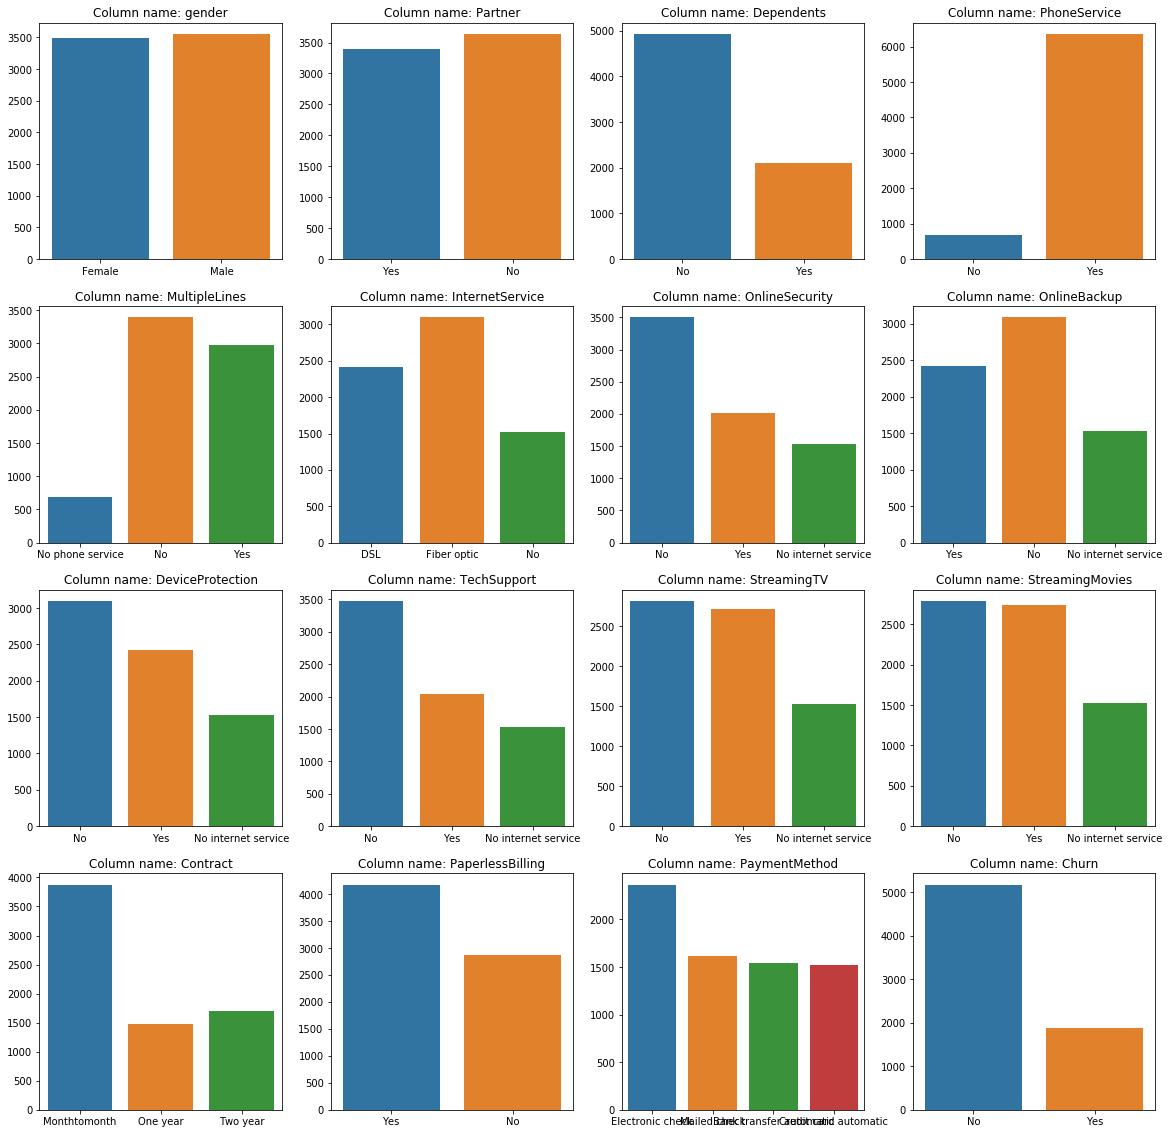

In [27]:
display_plot(df, 'customerid', object_mode = True)

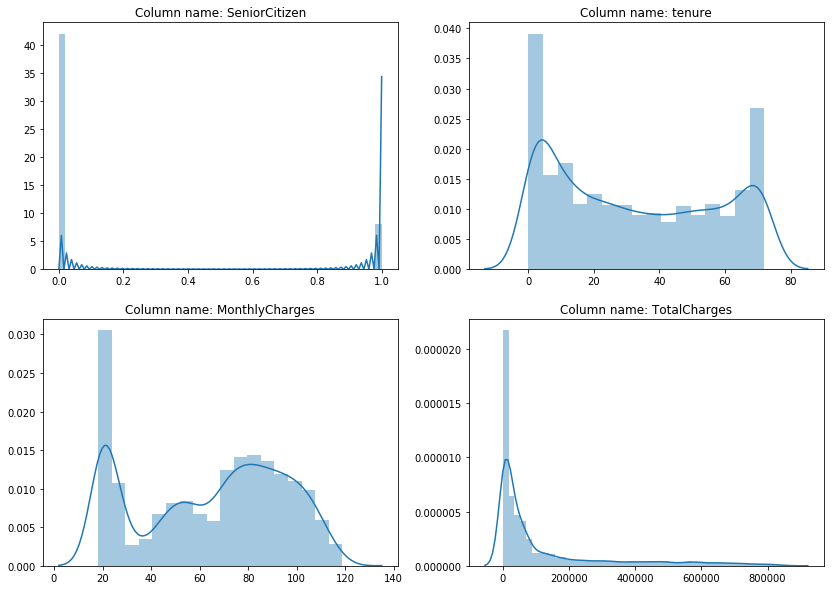

In [28]:
display_plot(df, 'customerid', object_mode = False)

###  feature Engineering 

Based on the value of the services the subscribers subscribed to, there are **yes**, **no**, and **no phone / internet service**. These are somewhat related to primary products. Examples are illustrated through *panda crosstab* function below:

1. **Phone service (Primary) and Multiple lines (Secondary)**
 
 - If the subscribers have phone service, they may have multiple lines (yes or no). 
 - But if the subscribers don't have phone service, the subscribers will never have multiple lines.
 

In [29]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


2. **Internet Service (Primary) and other services, let's say streaming TV (secondary)**

 - If the subscribers have Internet services (either DSL or Fiber optic), the subscribers may opt to have other services related to Internet (i.e. streaming TV, device protection).
 - But if the subscribers don't have the Internet services, this secondary service will not be available for the subscribers.
 

In [30]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


In [31]:
'''
checking for unique values in the columns
'''
print_unique_values_in_column(df)

gender  :  ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen  :  [0 1]
----------------------------------------------------------------------------------------------------
Partner  :  ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines  :  ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService  :  ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
------


With this conclusion, I opt to transform the feature value of **No Phone / Internet service** to be the same **No** because it can be used another features (hence, **phone service** and **internet service** column) to explain.

In [32]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == 'O') & (col != 'customerid'):
            if len(df[df[col].str.contains("No")][col].unique()) > 1:
                col_to_transform.append(col)
    
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'
        
    return df

In [33]:
df = convert_no_service(df)

Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


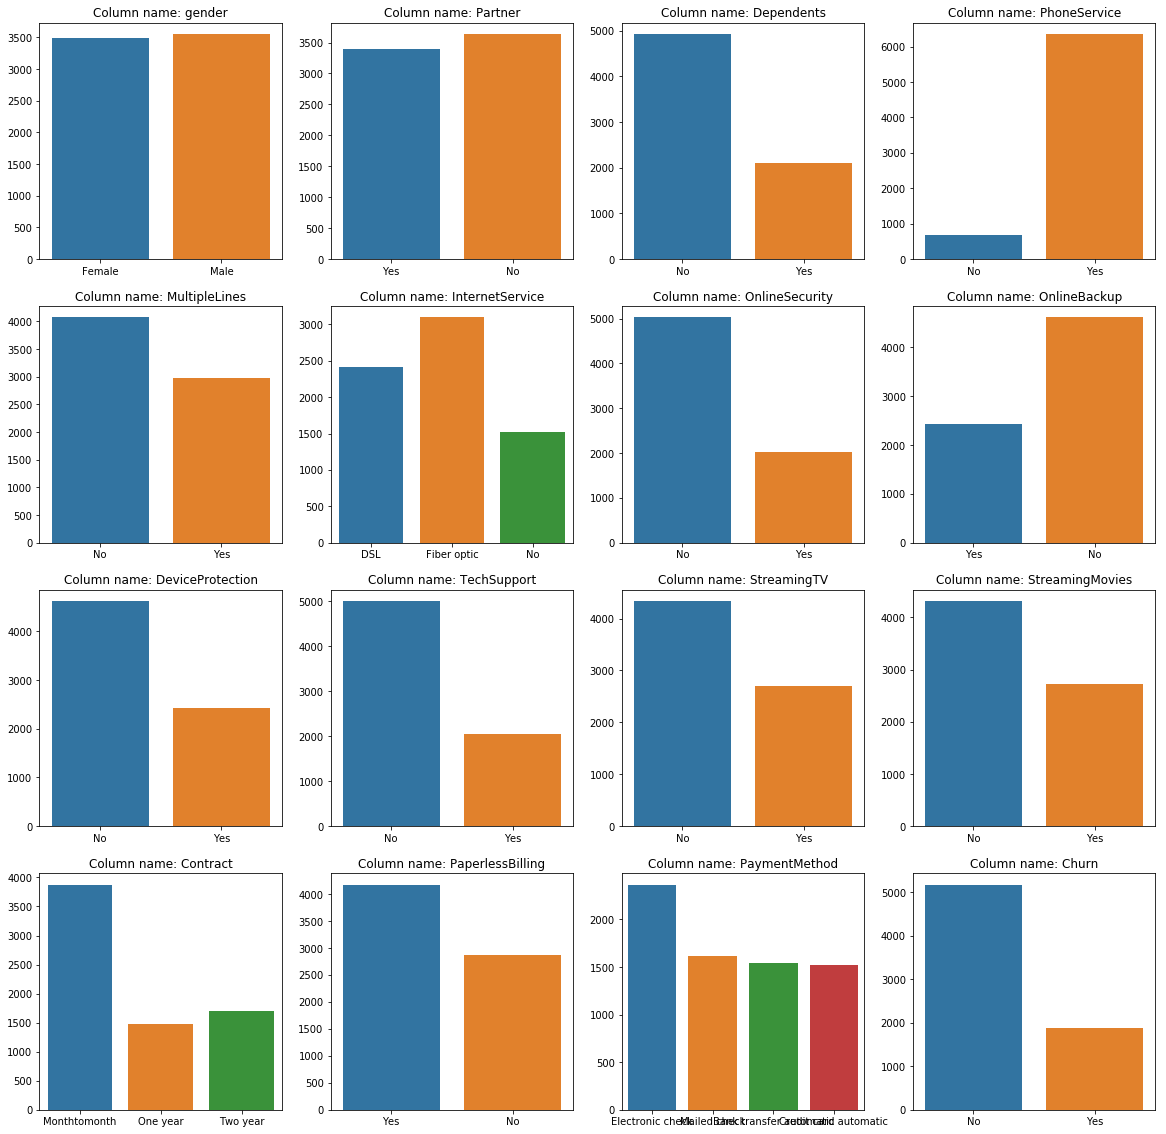

In [34]:
# Let's see the data after transformation.

display_plot(df, 'customerid', object_mode = True)

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043
Percent of Females that Left the Company 50.24077046548957
Percent of Males that Left the Company 49.75922953451043


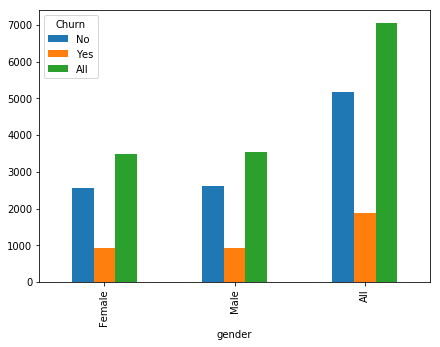

In [35]:
'''
Now Let's Start Comparing.
Gender Vs Churn
'''
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100))     

**Note1: We can See that Gender Does'nt Play an important Role in Predicting Our Target Variable.**

Churn           No   Yes   All
Contract                      
Monthtomonth  2220  1655  3875
One year      1307   166  1473
Two year      1647    48  1695
All           5174  1869  7043
Percent of Month-to-Month Contract People that Left the Company 88.55002675227395
Percent of One-Year Contract People that Left the Company 8.881754949170679
Percent of Two-Year Contract People that Left the Company 2.568218298555377


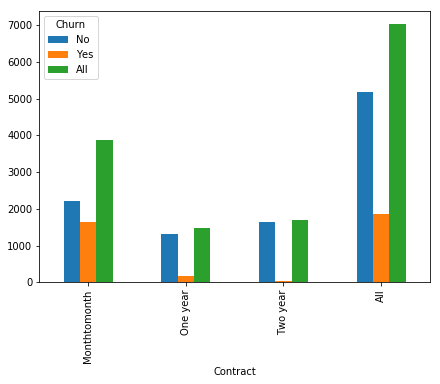

In [29]:
# Contract Vs Churn
print(pd.crosstab(df.Contract,df.Churn,margins=True))
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100)) 
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100))     

**Note2: Most of the People that Left were the Ones who had Month-to-Month  Contract.**

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043
Percent of DSL Internet-Service People that Left the Company 24.558587479935795
Percent of Fiber Optic Internet-Service People that Left the Company 69.39539860888175
Percent of No Internet-Service People that Left the Company 6.046013911182451


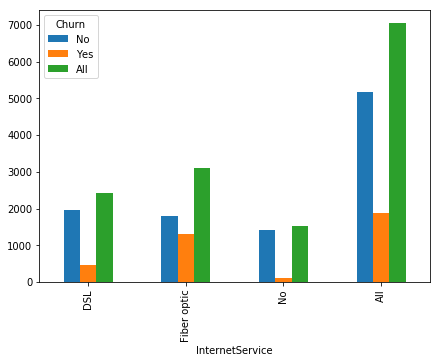

In [30]:
# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297/1869)*100)) 
print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))     

**Note3: Most of the people That Left had Fiber Optic Internet-Service.**

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043
Percent of Partner that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


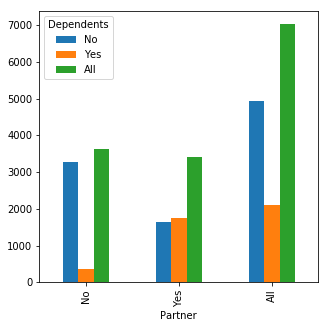

In [36]:
# Partner Vs Dependents
print(pd.crosstab(df.Partner,df.Dependents,margins=True))
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))     

**Note4: We can See Partners had a much larger percent of Dependents than Non-Partner this tells us that Most Partners might be Married.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


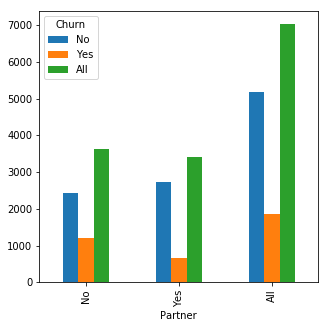

In [37]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5));

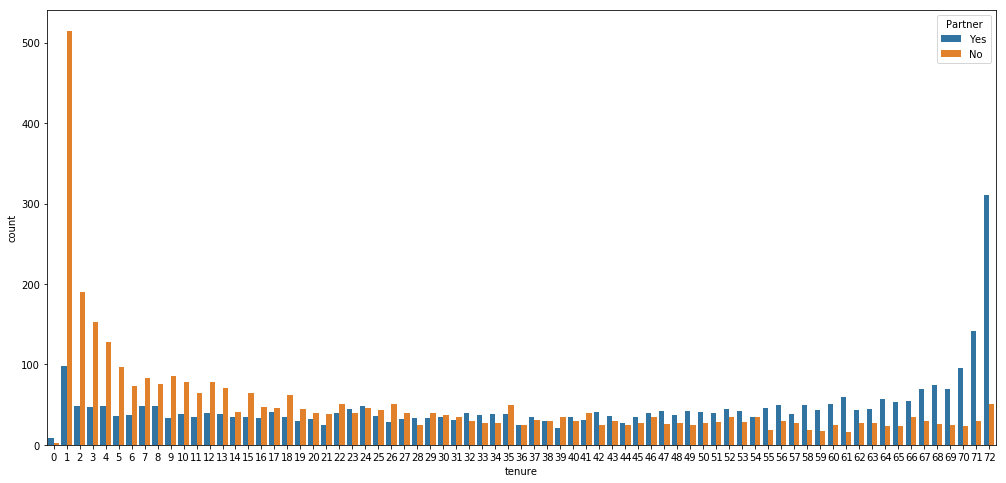

In [38]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

**Note5: Most of the People that Were Partner will Stay Longer with The Company. So Being a Partner is a Plus-Point For the Company as they will Stay Longer with Them.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


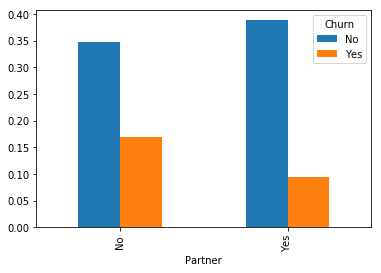

In [39]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,normalize=True).plot(kind='bar');

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


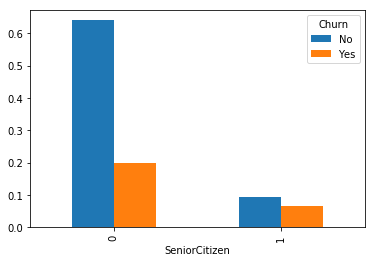

In [40]:
# Senior Citizen Vs Churn
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar');

**Let's Check for Outliers in Monthly Charges And Total Charges Using Box Plots**

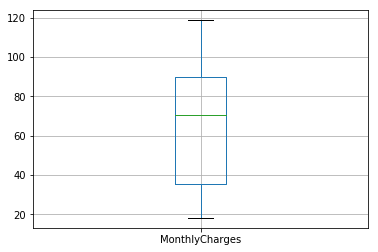

In [41]:
df.boxplot('MonthlyCharges');

**Monthly Charges don't have any Outliers so we don't have to Get into Extracting Information from Outliers.**

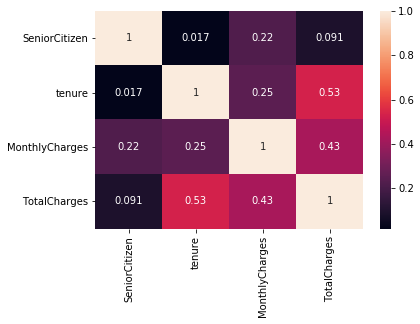

In [42]:
## correlation matrix 

# Let's Check the Correaltion Matrix in Seaborn
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);

**Here We can See Tenure and Total Charges are correlated and also Monthly charges and Total Charges are also correlated with each other.**

**we can assume from our domain expertise that , Total Charges ~ Monthly Charges * Tenure + Additional Charges(Tax).**

## <a id='9.4'> Bucketing </a>

In [43]:
#Tenure to categorical column
def tenure_lab(telcom) :
#     print(telcom)
#     print('-'*80)
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985.0,No,Tenure_0-12
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,18895.0,No,Tenure_24-48
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815.0,Yes,Tenure_0-12
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075.0,No,Tenure_24-48
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165.0,Yes,Tenure_0-12


# Data preprocessing 

## <a id='10.1'> Encoding categorical variable </a>

In [45]:
#replace values
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985.0,No,Tenure_0-12
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,18895.0,No,Tenure_24-48
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815.0,Yes,Tenure_0-12
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075.0,No,Tenure_24-48
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165.0,Yes,Tenure_0-12


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
tenure_group        7043 non-null object
dtypes: float64(2), i

In [48]:
print_unique_values_in_column(df)

gender  :  ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Partner  :  ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService  :  ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity  :  ['No' 'Yes']
----------------------------------------

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]

print(df.nunique())
print(100*'-')

#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
# df.nunique() :Return Series with number of distinct observations over requested axis.
 
print(cat_cols)

cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]



gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6433
Churn                  2
tenure_group           5
dtype: int64
----------------------------------------------------------------------------------------------------
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_group']


In [51]:
print(num_cols)
print('-'*80)
print(bin_cols)
print('-'*80)
print(multi_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']
--------------------------------------------------------------------------------
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
--------------------------------------------------------------------------------
['InternetService', 'Contract', 'PaymentMethod', 'tenure_group']


In [52]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer automatic,PaymentMethod_Credit card automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
7795-CFOCW,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [54]:
list(df.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Monthtomonth',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer automatic',
 'PaymentMethod_Credit card automatic',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_Tenure_0-12',
 'tenure_group_Tenure_12-24',
 'tenure_group_Tenure_24-48',
 'tenure_group_Tenure_48-60',
 'tenure_group_Tenure_gt_60']

In [56]:
#droping one columns each for multi-valued categorical variables
df.drop(['InternetService_No','Contract_Two year','PaymentMethod_Mailed check','tenure_group_Tenure_gt_60'],axis=1,inplace=True)

In [58]:
list(df.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'Contract_Monthtomonth',
 'Contract_One year',
 'PaymentMethod_Bank transfer automatic',
 'PaymentMethod_Credit card automatic',
 'PaymentMethod_Electronic check',
 'tenure_group_Tenure_0-12',
 'tenure_group_Tenure_12-24',
 'tenure_group_Tenure_24-48',
 'tenure_group_Tenure_48-60']

## <a id='10.2'> Normalizing features </a>

In [59]:
telcom = df

#Scaling Numerical columns
'''
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:  z = (x - u) / s

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
'''

std = StandardScaler()

scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [61]:
print(scaled.shape)
scaled.head()

(7043, 3)


,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.640817
1,0.066327,-0.259629,-0.558107
2,-1.236724,-0.362660,-0.600112
3,0.514251,-0.746535,0.300600
4,-1.236724,0.197365,-0.577498


In [62]:
#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)

In [63]:
print(telcom.shape)
telcom.head(2)

(7043, 25)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_Fiber optic,Contract_Monthtomonth,Contract_One year,PaymentMethod_Bank transfer automatic,PaymentMethod_Credit card automatic,PaymentMethod_Electronic check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [64]:
telcom.reset_index(drop=False, inplace=True)

telcom = pd.concat([telcom, scaled], axis=1)

telcom.set_index('customerID', inplace=True)

telcom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer automatic,PaymentMethod_Credit card automatic,PaymentMethod_Electronic check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,-1.277445,-1.160323,-0.640817
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0.066327,-0.259629,-0.558107
3668-QPYBK,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,-1.236724,-0.362660,-0.600112
7795-CFOCW,1,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,0.514251,-0.746535,0.300600
9237-HQITU,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,-1.236724,0.197365,-0.577498


In [68]:
telcom.shape

(7043, 28)

## <a id='10.3'> spliting train/val/test data </a>

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 

# telcom = df
target_col = telcom["Churn"]

train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)


X_train = train.drop(['Churn'], inplace=False, axis=1)
y_train = train["Churn"]
X_test  = test.drop(["Churn"], inplace=False, axis=1)
y_test  = test["Churn"]

In [84]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5282, 27), (5282,), (1761, 27), (1761,))

In [85]:
print(X_train.head())
print(100*'-')
print(y_train.head())
print(100*'-')
print(X_test.head())
print(100*'-')
print(y_test.head())

            gender  SeniorCitizen  Partner  Dependents  PhoneService  \
customerID                                                             
3521-SYVOR       0              0        0           0             1   
8660-BUETV       0              0        0           0             1   
8150-QUDFX       1              0        0           0             1   
8800-JOOCF       0              0        0           1             1   
2292-XQWSV       1              0        1           1             0   

            MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
customerID                                                                  
3521-SYVOR              0               0             0                 0   
8660-BUETV              0               0             0                 0   
8150-QUDFX              0               0             0                 0   
8800-JOOCF              1               0             0                 0   
2292-XQWSV              0        

#  Model Building 

In [75]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/1d/e7/5258cb787dc036f419ec57491decf8bfa89ab52c401b08b4b9228e43dc4c/xgboost-0.81-py2.py3-none-win_amd64.whl


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [76]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
from sklearn import tree , linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [77]:
# validation 
from sklearn import datasets, model_selection, metrics , preprocessing

In [78]:
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [79]:
# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

In [80]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [81]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

### <a id='11.1'> Baseline model with DummyClassifier</a>

In [86]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [87]:
accuracy = clf.score(X_test, y_test)  
accuracy

0.7535491198182851

In [88]:
preds = clf.predict(X_test)


# dummyistic Regression
start_time = time.time()
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0), X_train, y_train, X_test,10)
dummy_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))
print(100*'-')
print (metrics.classification_report(y_train, train_pred_dummy))
print(100*'-')
print (metrics.classification_report(y_test, test_pred_dummy))


Accuracy: 75.35
Accuracy CV 10-Fold: 72.83
Running Time: 0:00:02.501831
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      3847
           1       0.00      0.00      0.00      1435

   micro avg       0.73      0.73      0.73      5282
   macro avg       0.36      0.50      0.42      5282
weighted avg       0.53      0.73      0.61      5282

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1327
           1       0.00      0.00      0.00       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.38      0.50      0.43      1761
weighted avg       0.57      0.75      0.65      1761



## Select Candidate Algorithms

#### 1. KNN
#### 2. Logistic Regression
#### 3. Random Forest
#### 4. Naive Bayes
#### 5. Stochastic Gradient Decent
#### 6. Linear SVC
#### 7. Decision Tree
#### 8. Gradient Boosted Trees

In [89]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}



# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 24.09 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.798 (std: 0.005)
Parameters: {'class_weight': None, 'penalty': 'l2', 'C': 54837027756.86492, 'intercept_scaling': 6.74656809680195e-10}

Model with rank: 2
Mean validation score: 0.747 (std: 0.003)
Parameters: {'class_weight': 'balanced', 'penalty': 'l2', 'C': 48.99694665266877, 'intercept_scaling': 2.9925926487165014e-20}

Model with rank: 2
Mean validation score: 0.747 (std: 0.003)
Parameters: {'class_weight': 'balanced', 'penalty': 'l1', 'C': 543467424262.9061, 'intercept_scaling': 97140143315740.55}

Model with rank: 2
Mean validation score: 0.747 (std: 0.003)
Parameters: {'class_weight': 'balanced', 'penalty': 'l1', 'C': 9.036403176419207e+19, 'intercept_scaling': 49484.529682942375}

Model with rank: 5
Mean validation score: 0.747 (std: 0.003)
Parameters: {'class_weight': 'balanced', 'penalty': 'l1', 'C': 1610351536.7833662, 'intercept_scaling': 10536643.1113055

Accuracy: 80.98
Accuracy CV 10-Fold: 80.12
Running Time: 0:00:00.493983
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.52      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.71      0.73      5282
weighted avg       0.79      0.80      0.79      5282

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1327
           1       0.63      0.56      0.59       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.81      1761



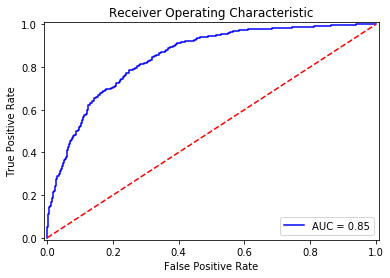

In [90]:
'''
Logistic Regression
'''
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), X_train, y_train, X_test, 10)
log_time = (time.time() - start_time)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))
print(100*'-')
print (metrics.classification_report(y_train, train_pred_log))
print(100*'-')
print (metrics.classification_report(y_test, test_pred_log))


plot_roc_curve(y_test, probs_log)

Accuracy: 76.66
Accuracy CV 10-Fold: 75.56
Running Time: 0:00:01.093468
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      3847
           1       0.55      0.51      0.53      1435

   micro avg       0.76      0.76      0.76      5282
   macro avg       0.69      0.68      0.68      5282
weighted avg       0.75      0.76      0.75      5282

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1327
           1       0.52      0.59      0.55       434

   micro avg       0.77      0.77      0.77      1761
   macro avg       0.69      0.71      0.70      1761
weighted avg       0.78      0.77      0.77      1761



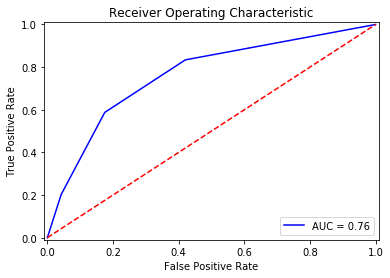

In [91]:
'''
k-Nearest Neighbors
'''
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,n_jobs = -1),X_train,y_train,X_test,10)  
                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
knn_time = (time.time() - start_time)


print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))
print(100*'-')
print (metrics.classification_report(y_train, train_pred_knn))
print(100*'-')
print (metrics.classification_report(y_test, test_pred_knn))


plot_roc_curve(y_test, probs_knn)

Accuracy: 73.99
Accuracy CV 10-Fold: 74.35
Running Time: 0:00:00.370050
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      3847
           1       0.52      0.75      0.61      1435

   micro avg       0.74      0.74      0.74      5282
   macro avg       0.70      0.75      0.71      5282
weighted avg       0.79      0.74      0.76      5282

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1327
           1       0.48      0.75      0.59       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.69      0.74      0.70      1761
weighted avg       0.80      0.74      0.76      1761



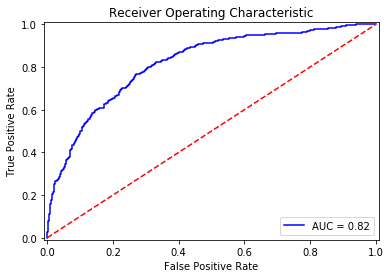

In [92]:
'''
Gaussian Naive Bayes
'''
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(),X_train,y_train,X_test,10)                                                                                                                                                                                                                                                                                                                                                      
gaussian_time = (time.time() - start_time)

print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))
print(100*'-')
print (metrics.classification_report(y_train, train_pred_gaussian)) 
print(100*'-')
print (metrics.classification_report(y_test, test_pred_gaussian)) 


plot_roc_curve(y_test, probs_gau)

Accuracy: 73.65
Accuracy CV 10-Fold: 72.11
Running Time: 0:00:00.448024
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3847
           1       0.49      0.49      0.49      1435

   micro avg       0.72      0.72      0.72      5282
   macro avg       0.65      0.65      0.65      5282
weighted avg       0.72      0.72      0.72      5282

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1327
           1       0.47      0.53      0.50       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.65      0.67      0.66      1761
weighted avg       0.75      0.74      0.74      1761



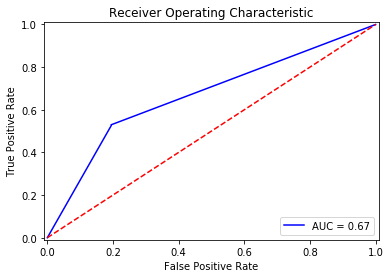

In [94]:
'''
Decision Tree Classifier
'''
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(),X_train,y_train,X_test,10)  
                                                             
dt_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))
print(100*'-')
print (metrics.classification_report(y_train, train_pred_dt))
print(100*'-')
print (metrics.classification_report(y_test, test_pred_dt))


plot_roc_curve(y_test, probs_dt)

In [95]:
'''
Random Forest Classifier - Random Search for Hyperparameters
'''
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 1.90 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.795 (std: 0.003)
Parameters: {'criterion': 'entropy', 'max_features': 5, 'max_depth': 10, 'bootstrap': False, 'min_samples_split': 13, 'min_samples_leaf': 5}

Model with rank: 2
Mean validation score: 0.793 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_features': 5, 'max_depth': None, 'bootstrap': True, 'min_samples_split': 14, 'min_samples_leaf': 5}

Model with rank: 3
Mean validation score: 0.792 (std: 0.002)
Parameters: {'criterion': 'entropy', 'max_features': 5, 'max_depth': None, 'bootstrap': True, 'min_samples_split': 8, 'min_samples_leaf': 6}

Model with rank: 4
Mean validation score: 0.791 (std: 0.005)
Parameters: {'criterion': 'gini', 'max_features': 5, 'max_depth': 10, 'bootstrap': True, 'min_samples_split': 15, 'min_samples_leaf': 7}

Model with rank: 5
Mean validation score: 0.791 (std: 0.003)
Parameters: {'criterion': 'entropy', 'max_features': 10, '

Accuracy: 79.44
Accuracy CV 10-Fold: 78.51
Running Time: 0:00:00.668910
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3847
           1       0.63      0.50      0.56      1435

   micro avg       0.79      0.79      0.79      5282
   macro avg       0.73      0.70      0.71      5282
weighted avg       0.77      0.79      0.78      5282

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1327
           1       0.60      0.51      0.55       434

   micro avg       0.79      0.79      0.79      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.79      0.79      0.79      1761



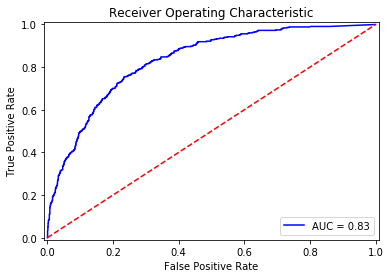

In [96]:
'''
Random Forest Classifier
'''
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, min_samples_leaf=2,min_samples_split=17,criterion='gini',max_features=8)
                            
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, X_train,y_train,X_test, 10)  

rf_time = (time.time() - start_time)

print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))
print(100*'-')
print (metrics.classification_report(y_train, train_pred_rf)) 
print(100*'-')
print (metrics.classification_report(y_test, test_pred_rf))


plot_roc_curve(y_test, probs_rf)

Accuracy: 80.64
Accuracy CV 10-Fold: 80.01
Running Time: 0:00:03.522620
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1327
           1       0.62      0.56      0.59       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



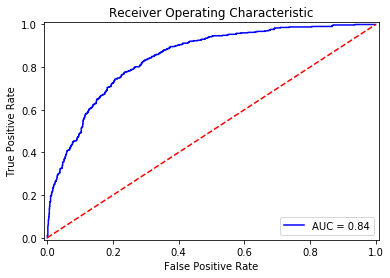

In [97]:
'''
Gradient Boosting Trees
'''
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train, X_test,10)                                                                
gbt_time = (time.time() - start_time)

print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))
print(100*'-')
print (metrics.classification_report(y_train, train_pred_gbt)) 
print(100*'-')
print (metrics.classification_report(y_test, test_pred_gbt))


plot_roc_curve(y_test, probs_gbt)

In [100]:
def xgb_f1(y, t):
    #
    # Function to evaluate the prediction based on F1 score, this will be used as evaluation metric when training xgboost model
    # Args:
    #   y: label
    #   t: predicted
    #
    # Return:
    #   f1: F1 score of the actual and predicted
    #
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)

best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = True,
                         n_jobs = 4
                        )

xgbst = best_xgb.fit(X_train, y_train, eval_metric = xgb_f1, eval_set = [(X_train, y_train), (X_test, y_test)], 
             early_stopping_rounds = 20)

[0]	validation_0-error:0.224915	validation_1-error:0.226576	validation_0-f1:0.606101	validation_1-f1:0.583072
Multiple eval metrics have been passed: 'validation_1-f1' will be used for early stopping.

Will train until validation_1-f1 hasn't improved in 20 rounds.
[1]	validation_0-error:0.214881	validation_1-error:0.235662	validation_0-f1:0.633042	validation_1-f1:0.582915
[2]	validation_0-error:0.215638	validation_1-error:0.230551	validation_0-f1:0.637146	validation_1-f1:0.596421
[3]	validation_0-error:0.212041	validation_1-error:0.215786	validation_0-f1:0.637306	validation_1-f1:0.612245
[4]	validation_0-error:0.204279	validation_1-error:0.212379	validation_0-f1:0.638284	validation_1-f1:0.609603
[5]	validation_0-error:0.204089	validation_1-error:0.211811	validation_0-f1:0.639947	validation_1-f1:0.608604
[6]	validation_0-error:0.207497	validation_1-error:0.219194	validation_0-f1:0.642764	validation_1-f1:0.609312
[7]	validation_0-error:0.205415	validation_1-error:0.215219	validation_0-f1

In [101]:
train_pred_xgbst, test_pred_xgbst, acc_xgbst, acc_cv_xgbst, probs_xgbst = fit_ml_algo(xgbst, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)

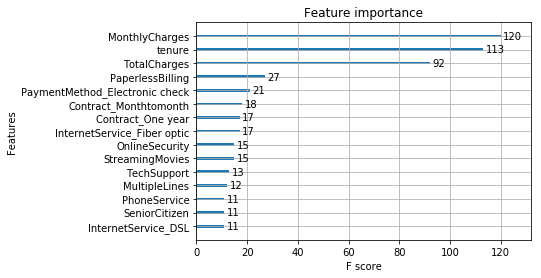

In [102]:
import xgboost as xgb
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show();

## <a id='' > Compare all models </a>

In [103]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
               
              'Decision Tree', 
              'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_dt,
        acc_gbt,
        
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,80.98
5,Gradient Boosting Trees,80.64
2,Random Forest,79.44
0,KNN,76.66
3,Naive Bayes,73.99
4,Decision Tree,73.65


In [104]:

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees',
    
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black',
]

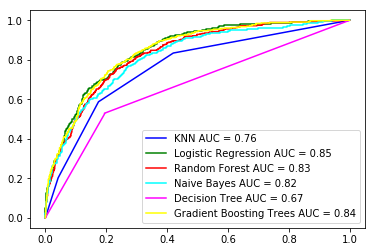

In [105]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

# Observations 

##  Conclusions from the exploratory data analysis 

>#### 1. Most of the People that Left were the Ones who had Month-to-Month Contract
>#### 2. Most of the people That Left had Fiber Optic Internet-Service.
>#### 3. Most of the People that Were Partner will Stay Longer with The Company. So Being a Partner is a Plus-Point For the Company as they will Stay Longer with Them.
>#### 4. Prediction accuracy for churn prediction
>> #### 1	Logistic Regression	: 80.98 %
>> #### 5	Gradient Boosting Trees	: 80.64 %
>> #### 2	Random Forest	: 79.44 %
>> #### 0	KNN	: 76.66 %
>> #### 3	Naive Bayes	: 73.99 %
>> #### 4	Decision Tree	: 73.65 %